In [32]:
# 対象テキストのダウンロード
!wget https://nlp100.github.io/data/ai.ja.zip
!unzip ai.ja.zip -d ai.ja
!ls -l
!ls -l ai.ja

In [ ]:
# mecabのインストール
!apt-get install mecab swig libmecab-dev mecab-ipadic-utf8 >/dev/null
# mecab-pythonのインストール
!pip -q install mecab-python3

In [ ]:
# crfpp のインストール
import os
filename_crfpp = 'crfpp.tar.gz'
!wget "https://drive.google.com/uc?export=download&id=0B4y35FiV1wh7QVR6VXJ5dWExSTQ" \
    -O $filename_crfpp
!tar zxvf $filename_crfpp
%cd CRF++-0.58
!./configure
!make
!make install
%cd ..
os.environ['LD_LIBRARY_PATH'] += ':/usr/local/lib' 

In [ ]:
# cabocha のインストール
FILE_ID = "0B4y35FiV1wh7SDd1Q1dUQkZQaUU"
FILE_NAME = "cabocha.tar.bz2"
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=$FILE_ID' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=$FILE_ID" -O $FILE_NAME && rm -rf /tmp/cookies.txt
!tar -xvf cabocha.tar.bz2
%cd cabocha-0.69
!./configure --with-mecab-config=`which mecab-config` --with-charset=UTF8
!make
!make check
!make install
%cd ..
!cabocha --version

In [33]:
import os
import re
import subprocess

In [34]:
file = os.path.join('ai.ja', 'ai.ja.txt') 
cleaned_file = os.path.join('ai.ja', 'ai.ja.txt.cleaned')  # 丸括弧でくくられた箇所を除去し、鍵括弧記号と空白を除去
cleaned_parsed_file = os.path.join('ai.ja', 'ai.ja.txt.cleaned.parsed') # 処理後のテキストを句点で分割し、cabocha -f1 で係り受け解析を行った結果

output = []
with open(file, encoding='utf-8') as f:
    lines = f.read().splitlines()
    for text in lines:
        sub_text = re.sub(r'（.*?）', '', text)
        sub_text = re.sub(r'\(.*?\)', '', sub_text)
        sub_text = re.sub(r'[「」『』【】]', '', sub_text)
        sub_text = re.sub(r'\s', '', sub_text)
        for _sub_text in sub_text.split('。'):
            if len(_sub_text) > 0:
                output.append(_sub_text+'。\n')

with open(cleaned_file, 'w', encoding='utf-8') as f:
    f.writelines(output)

# cp = subprocess.run(['cabocha', '-f1', '-o', cleaned_parsed_file, cleaned_file])  # macbookpro の上で実行した

i = 0
with open(cleaned_parsed_file, encoding='utf-8') as f:
    lines = f.read().splitlines()
    for text in lines:
        print(text)
        if re.search(r'EOS', text):
            i = i + 1
        if i > 2:
            break


* 0 -1D 1/1 0.000000
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
。	記号,句点,*,*,*,*,。,。,。
EOS
* 0 11D 1/3 -1.200307
人工	名詞,一般,*,*,*,*,人工,ジンコウ,ジンコー
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
と	助詞,格助詞,一般,*,*,*,と,ト,ト
は	助詞,係助詞,*,*,*,*,は,ハ,ワ
、	記号,読点,*,*,*,*,、,、,、
* 1 2D 0/1 0.122505
計算	名詞,サ変接続,*,*,*,*,計算,ケイサン,ケイサン
という	助詞,格助詞,連語,*,*,*,という,トイウ,トユウ
* 2 3D 0/1 0.823072
概念	名詞,一般,*,*,*,*,概念,ガイネン,ガイネン
と	助詞,並立助詞,*,*,*,*,と,ト,ト
* 3 4D 0/1 1.598785
コンピュータ	名詞,一般,*,*,*,*,コンピュータ,コンピュータ,コンピュータ
という	助詞,格助詞,連語,*,*,*,という,トイウ,トユウ
* 4 5D 0/1 2.110573
道具	名詞,一般,*,*,*,*,道具,ドウグ,ドーグ
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 5 7D 0/1 1.300800
用い	動詞,自立,*,*,一段,連用形,用いる,モチイ,モチイ
て	助詞,接続助詞,*,*,*,*,て,テ,テ
* 6 7D 0/1 2.172716
知能	名詞,一般,*,*,*,*,知能,チノウ,チノー
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 7 8D 1/1 1.285275
研究	名詞,サ変接続,*,*,*,*,研究,ケンキュウ,ケンキュー
する	動詞,自立,*,*,サ変・スル,基本形,する,スル,スル
* 8 9D 2/3 1.295899
計算	名詞,サ変接続,*,*,*,*,計算,ケイサン,ケイサン
機	名詞,接尾,一般,*,*,*,機,キ,キ
科学	名詞,一般,*,*,*,*,科学,カガク,カガク
の	助詞,連体化,*,*,*,*,の,ノ,ノ
* 9 10D 1/2 2.023416
一	名詞,数,*,*,*,*,一,イチ,イチ
分野	名詞,一般,*,*,*,*,分

* 第5章 係り受け解析 in 言語処理100本ノック
* 40. 係り受け解析結果の読み込み（形態素）

In [35]:
class Morph():
    '''形態素を表すクラスMorph'''
    def __init__(self, _i, _surface, _base, _pos, _pos1):
        self.i = _i
        self.surface = _surface
        self.base = _base
        self.pos = _pos
        self.pos1 = _pos1
        
    def get(self):
        return {'i': self.i, 'surface': self.surface, 'base': self.base, 'pos': self.pos, 'pos1': self.pos1}

file = os.path.join('ai.ja', 'ai.ja.txt.cleaned.parsed')

i = -1
morphs = []

with open(file, encoding='utf-8') as f:
    lines = f.read().splitlines()
    for text in lines:
        if re.search(r'^\*', text):
            attr = text.split(' ')
            i = int(attr[1])
        elif not re.search(r'^EOS', text):
            surface, tags = text.split('\t')
            tag = tags.split(',')
            morphs.append(Morph(i, surface, tag[6], tag[0], tag[1]))

In [36]:
for i in range(100,120):
    print(i, morphs[i].get())

100 {'i': 5, 'surface': 'いる', 'base': 'いる', 'pos': '動詞', 'pos1': '非自立'}
101 {'i': 5, 'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}
102 {'i': 0, 'surface': '人間', 'base': '人間', 'pos': '名詞', 'pos1': '一般'}
103 {'i': 0, 'surface': 'の', 'base': 'の', 'pos': '助詞', 'pos1': '連体化'}
104 {'i': 1, 'surface': '知的', 'base': '知的', 'pos': '名詞', 'pos1': '一般'}
105 {'i': 1, 'surface': '能力', 'base': '能力', 'pos': '名詞', 'pos1': '一般'}
106 {'i': 1, 'surface': 'を', 'base': 'を', 'pos': '助詞', 'pos1': '格助詞'}
107 {'i': 2, 'surface': 'コンピュータ', 'base': 'コンピュータ', 'pos': '名詞', 'pos1': '一般'}
108 {'i': 2, 'surface': '上', 'base': '上', 'pos': '名詞', 'pos1': '接尾'}
109 {'i': 2, 'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}
110 {'i': 3, 'surface': '実現', 'base': '実現', 'pos': '名詞', 'pos1': 'サ変接続'}
111 {'i': 3, 'surface': 'する', 'base': 'する', 'pos': '動詞', 'pos1': '自立'}
112 {'i': 3, 'surface': '、', 'base': '、', 'pos': '記号', 'pos1': '読点'}
113 {'i': 4, 'surface': '様々', 'base': '様々', 'pos': '名詞', 'pos1': '形容動詞語幹'}


41. 係り受け解析結果の読み込み（文節・係り受け）

In [37]:
class Chunk():
    '''文節を表すクラスChunk'''
    def __init__(self, _i, _morphs, _dst):
        self.i = _i
        self.morphs = _morphs
        self.dst = _dst
        self.srcs = []

_morphs = []
_chunks = []
sentences = []
_dst = -1

# file = os.path.join('ai.ja', 'ai.ja.txt.parsed')
file = os.path.join('ai.ja', 'ai.ja.txt.cleaned.parsed')
with open(file, encoding='utf-8') as f:
    lines = f.read().splitlines()
    for text in lines:
        if re.search(r'^\*', text):
            if len(_morphs) > 0:
                _chunks.append(Chunk(i, _morphs, _dst))
                _morphs = []
            i = int(text.split(' ')[1])
            _dst = int(text.split(' ')[2].rstrip('D'))
        elif not re.search(r'^EOS', text):
            surface, tags = text.split('\t')
            if not re.search(r'[、。]', surface):
                tag = tags.split(',')
                _morphs.append(Morph(i, surface, tag[6], tag[0], tag[1]))
        else:  # if text is 'EOS'
            if len(_morphs) > 0:
                _chunks.append(Chunk(i, _morphs, _dst))
                for _chunk in _chunks:
                    if _chunk.dst != -1:
                        _chunks[_chunk.dst].srcs.append(_chunk.i)
                
                sentences.append(_chunks)
                _morphs = []
                _chunks = []
                i = -1
                _dst = -1

In [38]:
_chunks = sentences[1]
for _chunk in _chunks:
    _surface = []
    for _morph in _chunk.morphs:
        _surface.append(_morph.surface)
    print(_chunk.i, _surface, _chunk.dst, _chunk.srcs)

# for _chunks in sentences:
#     for _chunk in _chunks:
#         _surface = []
#         for _morph in _chunk.morphs:
#             _surface.append(_morph.surface)
#         print(_chunk.i, _surface, _chunk.dst, _chunk.srcs)

0 ['人工', '知能', 'と', 'は'] 11 []
1 ['計算', 'という'] 2 []
2 ['概念', 'と'] 3 [1]
3 ['コンピュータ', 'という'] 4 [2]
4 ['道具', 'を'] 5 [3]
5 ['用い', 'て'] 7 [4]
6 ['知能', 'を'] 7 []
7 ['研究', 'する'] 8 [5, 6]
8 ['計算', '機', '科学', 'の'] 9 [7]
9 ['一', '分野', 'を'] 10 [8]
10 ['指す'] 11 [9]
11 ['語'] -1 [0, 10]


42. 係り元と係り先の文節の表示

In [39]:
_chunks = sentences[1]
for _chunk in _chunks:
    if _chunk.dst != -1:
        _src_surface = ''
        for _morph in _chunk.morphs:
            _src_surface = _src_surface + _morph.surface
        _dst_surface = ''
        for _morph in _chunks[_chunk.dst].morphs:
            _dst_surface = _dst_surface + _morph.surface
        print(f'{_src_surface}\t{_dst_surface}')

人工知能とは	語
計算という	概念と
概念と	コンピュータという
コンピュータという	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学の
計算機科学の	一分野を
一分野を	指す
指す	語


43. 名詞を含む文節が動詞を含む文節に係るものを抽出

In [40]:
_chunks = sentences[20]
for _chunk in _chunks:
    _noun_flag = False
    _verb_flag = False
    if _chunk.dst != -1:
        _src_surface = ''
        for _morph in _chunk.morphs:
            _src_surface = _src_surface + _morph.surface
            if _morph.pos == '名詞':
                _noun_flag = True
        _dst_surface = ''
        for _morph in _chunks[_chunk.dst].morphs:
            _dst_surface = _dst_surface + _morph.surface
            if _morph.pos == '動詞':
                _verb_flag = True
        if _noun_flag and _verb_flag:
            print(f'{_src_surface}\t{_dst_surface}')

これらを	統合した
知的システムを	作る
試みも	なされている


44. 係り受け木の可視化

人工知能とは	語
計算という	概念と
概念と	コンピュータという
コンピュータという	道具を
道具を	用いて
用いて	研究する
知能を	研究する
研究する	計算機科学の
計算機科学の	一分野を
一分野を	指す
指す	語


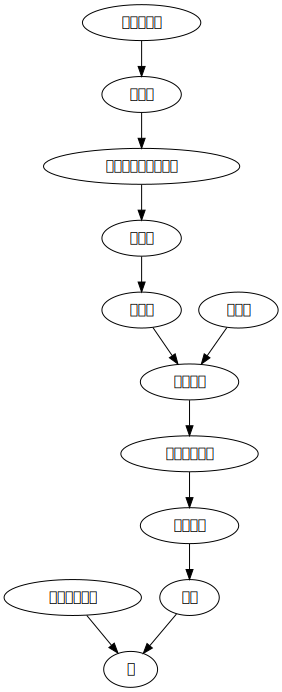

In [41]:
from graphviz import Digraph

# グラフの作成、フォント設定
dot = Digraph(format='png')
dot.attr('node', fontname="MS Gothic")

# 42.係り元と係り先の文節の表示 にグラフ作成を追加
_chunks = sentences[1]
for _chunk in _chunks:
    if _chunk.dst != -1:
        _src_surface = ''
        for _morph in _chunk.morphs:
            _src_surface = _src_surface + _morph.surface
        _dst_surface = ''
        for _morph in _chunks[_chunk.dst].morphs:
            _dst_surface = _dst_surface + _morph.surface
        print(f'{_src_surface}\t{_dst_surface}')
        
        dot.node(_src_surface)
        dot.node(_dst_surface)
        dot.edge(_src_surface, _dst_surface)
        
dot

45. 動詞の格パターンの抽出
* 動詞を述語，動詞に係っている文節の助詞を格と考え，述語と格をタブ区切り形式で出力

In [42]:
_cases = {}
for _chunks in sentences:
    for _chunk in _chunks:
        for _morph in _chunk.morphs:
            if _morph.pos == '動詞':
                _particles = []
                for _src in _chunk.srcs:
                    if _chunks[_src].morphs[-1].pos == '助詞':
                        if _chunks[_src].morphs[-1].base not in _particles:
                            _particles.append(_chunks[_src].morphs[-1].base)
                if len(_particles) > 0:
                    _particles.sort()
                    _particle_list = ' '.join(_particles)
                    _key = f'{_morph.base}:{_particle_list}'
                    if _key not in _cases:
                        _cases[_key] = 0
                    _cases[_key] = _cases[_key] + 1

i = 1
for _key, _value in sorted(_cases.items(), key=lambda x:x[1], reverse=True):
    _key = re.sub(r':', '\t', _key)
    print(i, _key, f'\t({_value})')
    i = i + 1
    if i > 10:
        break

1 する	を 	(55)
2 する	と 	(23)
3 する	が 	(21)
4 する	に 	(14)
5 れる	と 	(13)
6 する	は を 	(13)
7 よる	に 	(12)
8 する	に を 	(10)
9 する	で を 	(9)
10 する	が に 	(9)


In [43]:
for _key, _value in sorted(_cases.items(), key=lambda x:x[1], reverse=True):
    if re.search(r'^行う', _key):
        _key = re.sub(r':', '\t', _key)
        print(_key, f'\t({_value})')

行う	を 	(8)
行う	は を 	(2)
行う	て に 	(1)
行う	に を 	(1)
行う	が に は 	(1)
行う	に 	(1)
行う	に により を 	(1)
行う	て に を 	(1)
行う	は 	(1)
行う	で に を 	(1)
行う	で を 	(1)
行う	に まで を 	(1)
行う	が は 	(1)
行う	が で は 	(1)
行う	は を をめぐって 	(1)
行う	で は まで を 	(1)


In [44]:
for _key, _value in sorted(_cases.items(), key=lambda x:x[1], reverse=True):
    if re.search(r'^なる', _key):
        _key = re.sub(r':', '\t', _key)
        print(_key, f'\t({_value})')

なる	が と 	(4)
なる	に は 	(4)
なる	に 	(2)
なる	と 	(2)
なる	は も 	(2)
なる	と など 	(1)
なる	に によって は 	(1)
なる	が 	(1)
なる	から で と 	(1)
なる	が は 	(1)
なる	が に 	(1)
なる	が に は 	(1)
なる	は 	(1)
なる	て は 	(1)
なる	が で に 	(1)
なる	から が で も 	(1)
なる	で に は 	(1)
なる	から が て と は ば 	(1)
なる	として に は 	(1)
なる	が で と に は 	(1)
なる	が にとって は 	(1)
なる	と を 	(1)
なる	は を 	(1)
なる	で は 	(1)


In [45]:
for _key, _value in sorted(_cases.items(), key=lambda x:x[1], reverse=True):
    if re.search(r'^与える', _key):
        _key = re.sub(r':', '\t', _key)
        print(_key, f'\t({_value})')

与える	が に 	(2)
与える	に は を 	(1)


46. 動詞の格フレーム情報の抽出
* 45のプログラムを改変し，述語と格パターンに続けて項（述語に係っている文節そのもの）をタブ区切り形式で出力
  * 項は述語に係っている文節の単語列とする（末尾の助詞を取り除く必要はない）
  * 述語に係る文節が複数あるときは，助詞と同一の基準・順序でスペース区切りで並べる

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」
```
    作り出す	で は を	会議で ジョンマッカーシーは 用語を
```

In [46]:
for _chunks in sentences:
    _text = ''
    for _chunk in _chunks:
        for _morph in _chunk.morphs:
            _text = _text + _morph.surface
            if _morph.pos == '動詞':
                _particles = []
                _surfaces = []
                for _src in _chunk.srcs:
                    _surface = ''
                    if _chunks[_src].morphs[-1].pos == '助詞':
                        if _chunks[_src].morphs[-1].base not in _particles:
                            _particles.append(_chunks[_src].morphs[-1].base)
                        for _src_morph in _chunks[_src].morphs:
                            _surface = _surface + _src_morph.surface
                        _surfaces.append(_surface)
                            
                if len(_particles) > 0:
                    _particle_list = ' '.join(_particles)
                    _surface_list = ' '.join(_surfaces)
                    print(f'{_morph.base}\t{_particle_list}\t{_surface_list}')

                break

    # print(_text)


用いる	を	道具を
する	て を	用いて 知能を
指す	を	一分野を
代わる	を に	知的行動を 人間に
行う	て に	代わって コンピューターに
する	とも	研究分野とも
述べる	で は に	解説で 佐藤理史は 次のように
する	を で	知的能力を コンピュータ上で
する	を	推論・判断を
する	を	画像データを
する	て を	解析して パターンを
ある	は が	応用例は 画像認識等が
する	に で により	1956年に ダートマス会議で ジョン・マッカーシーにより
用いる	を	記号処理を
する	を と	記述を 主体と
使う	は でも	現在では 意味あいでも
呼ぶ	も	思考ルーチンも
ある	も	ことも
よる	に	プログラミング言語に
する	を	カウンセラーを
出す	が に	プログラムが 引き合いに
する	に を	計算機に 役割を
呼ぶ	と	エキスパートシステムと
持つ	が に	人間が 暗黙に
なる	が と	記述が 問題と
する	が は	出されるが 実現は 利用が
知る	は も	アプローチとしては アプローチも
ある	が は に	知られているが 差は 記号的明示性に
集める	が を	サポートベクターマシンが 注目を
行う	を に	経験を 元に 学習を
ある	も	手法も
する	を に	知性を 機械的に
超える	を	流行を
する	て に	超えて 社会に
行く	により て	登場により 浸透して
する	にかけて を	2017年にかけて ディープラーニングを
破る	も	プレイヤーも
する	は が として に	麻雀では MicrosoftSuphxが AIとして 十段に
なる	など と	到達するなど 最先端技術と
呼ぶ	は と	人工知能は 機械学習と
ある	が	ものが
繰り返す	を	学習を
する	は を と	計算知能は ことを 基本と
基づく	に	経験に
する	と	ソフトコンピューティングと
ある	は が	手法としては ものが
する	を	これらを
作る	を	知的システムを
なす	も	試みも
する	は を に を通して	ACT-Rでは 推論ルールを 統計的学習を 元に 生成規則を通して
上回る	で を	領域で 人工知能を
出す	を	精度を
行う	は が に	第3次人工知能ブームでは 研究が 盛んに
でる	が	派生が
する	は て で	最近では でて 各分野で
だす	が で を	デ

47. 機能動詞構文のマイニング

* 動詞のヲ格にサ変接続名詞が入っている場合のみに着目したい．46のプログラムを以下の仕様を満たすように改変せよ．
  * 「サ変接続名詞+を（助詞）」で構成される文節が動詞に係る場合のみを対象とする
  * 述語は「サ変接続名詞+を+動詞の基本形」とし，文節中に複数の動詞があるときは，最左の動詞を用いる
  * 述語に係る助詞（文節）が複数あるときは，すべての助詞をスペース区切りで辞書順に並べる
  * 述語に係る文節が複数ある場合は，すべての項をスペース区切りで並べる（助詞の並び順と揃えよ）

例えば「また、自らの経験を元に学習を行う強化学習という手法もある。」という文から，以下の出力が得られるはずである．
```
学習を行う	に を	元に 経験を

＃＃＃ cabocha の出力 ＃＃＃
* 0 8D 0/0 -1.930928
また	接続詞,*,*,*,*,*,また,マタ,マタ
、	記号,読点,*,*,*,*,、,、,、
* 1 2D 0/1 1.962863
自ら	名詞,副詞可能,*,*,*,*,自ら,ミズカラ,ミズカラ
の	助詞,連体化,*,*,*,*,の,ノ,ノ
* 2 5D 0/1 0.574114
経験	名詞,サ変接続,*,*,*,*,経験,ケイケン,ケイケン
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 3 5D 0/1 1.647927
元	名詞,一般,*,*,*,*,元,モト,モト
に	助詞,格助詞,一般,*,*,*,に,ニ,ニ
* 4 5D 0/1 2.489314
学習	名詞,サ変接続,*,*,*,*,学習,ガクシュウ,ガクシュー
を	助詞,格助詞,一般,*,*,*,を,ヲ,ヲ
* 5 6D 0/0 1.354331
行う	動詞,自立,*,*,五段・ワ行促音便,基本形,行う,オコナウ,オコナウ
* 6 7D 1/2 1.920681
強化	名詞,サ変接続,*,*,*,*,強化,キョウカ,キョーカ
学習	名詞,サ変接続,*,*,*,*,学習,ガクシュウ,ガクシュー
という	助詞,格助詞,連語,*,*,*,という,トイウ,トユウ
* 7 8D 0/1 -1.930928
手法	名詞,一般,*,*,*,*,手法,シュホウ,シュホー
も	助詞,係助詞,*,*,*,*,も,モ,モ
* 8 -1D 0/0 0.000000
ある	動詞,自立,*,*,五段・ラ行,基本形,ある,アル,アル
。	記号,句点,*,*,*,*,。,。,。
EOS
```

In [47]:
for _chunks in sentences:
    _text = ''
    _flag = False
    _verb = ''
    _particles = []
    _surfaces = []
    for i in range(len(_chunks)):
        _text = _text + ' '
        for j in range(len(_chunks[i].morphs)):
            _text = _text + '/' + _chunks[i].morphs[j].surface
            if _chunks[i].morphs[j].pos == '名詞' and _chunks[i].morphs[j].pos1 == 'サ変接続':
                if j+1 < len(_chunks[i].morphs) and _chunks[i].morphs[j+1].pos == '助詞' and _chunks[i].morphs[j+1].surface == 'を':
                    if i+1 < len(_chunks):
                        for k in range(len(_chunks[i+1].morphs)):
                            if _chunks[i+1].morphs[k].pos == '動詞':
                                _verb = _chunks[i].morphs[j].surface + _chunks[i].morphs[j+1].surface + _chunks[i+1].morphs[k].base
                                for _src in _chunks[i+1].srcs:
                                    if _chunks[_src].morphs[-1].pos == '助詞' and _src != _chunks[i].i:
                                        _flag = True
                                        _particles.append(_chunks[_src].morphs[-1].surface)
                                        _surface = ''
                                        for _src_morph in _chunks[_src].morphs:
                                            _surface = _surface + _src_morph.surface
                                        _surfaces.append(_surface)
                                break

    if _flag:
        print(f'{_verb}\t{" ".join(_particles)}\t{" ".join(_surfaces)}')
        # print(_text)

注目を集める	が	サポートベクターマシンが
学習を行う	を に	経験を 元に
進化を見せる	は て において	GANは 加えて 生成技術において
開発を行う	は	エイダ・ラブレスは
処理を行う	により に	ティム・バーナーズ＝リーにより Webに
処理を行う	に て に	データに 付加して コンピュータに
研究を進める	て	費やして
運転をする	に	元に
特許をする	に が	2018年までに 日本が
運転をする	て に	基づいて 柔軟に
注目を集める	から は	ことから ファジィは
制御を用いる	て も	受けて 他社も
改善を果たす	に で が	2012年に 画像処理コンテストで チームが
研究を続ける	が て	ジェフ・ホーキンスが 向けて
学習をする	が	データが
注目を集める	に	急速に
投資を行う	に で	全世界的に 民間企業主導で
探索を行う	で	無報酬で
研究を行う	とも は	マックスプランク研究所とも Googleは
開発をする	は で	中国では 官民一体で
開発をする	で	日本で
投資をする	は に	韓国は 2022年までに
反乱を起こす	て に対して	於いて 人間に対して
手続きを経る	を	ウイグル族を
制御をする	は	AIプログラムは
判断を介す	から	観点から
禁止を求める	は が	4月には ヒューマン・ライツ・ウォッチが
追及を受ける	は とともに と で	公聴会では 秘密計画とともに 拒否すると 整合性で
研究をする	が	Microsoftが
解任をする	は	Google社員らは
解散をする	は で	Googleは 理由で
存在を見いだす	に	ものに
話をする	ば は	よれば 哲学者は
議論を行う	で は まで	対談で 須藤は これまで


48. 名詞から根へのパスの抽出

* 文中のすべての名詞を含む文節に対し，その文節から構文木の根に至るパスを抽出せよ． ただし，構文木上のパスは以下の仕様を満たすものとする．
  * 各文節は（表層形の）形態素列で表現する
  * パスの開始文節から終了文節に至るまで，各文節の表現を” -> “で連結する

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」
```
ジョンマッカーシーは -> 作り出した
AIに関する -> 最初の -> 会議で -> 作り出した
最初の -> 会議で -> 作り出した
会議で -> 作り出した
人工知能という -> 用語を -> 作り出した
用語を -> 作り出した
```

In [48]:
i = 0
for _chunks in sentences:
    for _chunk in _chunks:
        _i = -1
        for _morph in _chunk.morphs:
            if _morph.pos == '名詞':
                _i = _chunk.i
                break
        if _i != -1:
            _tree = []
            while _i != -1:
                _phrase = ''
                for _morph in _chunks[_i].morphs:
                    _phrase = _phrase + _morph.surface
                _tree.append(_phrase)
                _i = _chunks[_i].dst
            print(' -> '.join(_tree))
            # break
    i = i + 1
    if i > 3:
        break

人工知能
人工知能とは -> 語
計算という -> 概念と -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> 語
概念と -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> 語
コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> 語
道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> 語
知能を -> 研究する -> 計算機科学の -> 一分野を -> 指す -> 語
研究する -> 計算機科学の -> 一分野を -> 指す -> 語
計算機科学の -> 一分野を -> 指す -> 語
一分野を -> 指す -> 語
語
言語の -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
理解や -> 推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
推論 -> 問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
問題解決などの -> 知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
知的行動を -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
人間に -> 代わって -> 行わせる -> 技術または -> 研究分野とも -> される
コンピューターに -> 行わせる -> 技術または -> 研究分野とも -> される
技術または -> 研究分野とも -> される
計算機による -> 情報処理システムの -> 実現に関する -> 研究分野とも -> される
知的な -> 情報処理システムの -> 実現に関する -> 研究分野とも -> される
情報処理システムの -> 実現に関する -> 研究分野とも -> される
設計や -> 実現に関する -> 研究分野とも -> される
実現に関する -> 研究分野とも -> される

49. 名詞間の係り受けパスの抽出

* 文中のすべての名詞句のペアを結ぶ最短係り受けパスを抽出せよ．ただし，名詞句ペアの文節番号がiとj（i<j）のとき，係り受けパスは以下の仕様を満たすものとする．
  * 問題48と同様に，パスは開始文節から終了文節に至るまでの各文節の表現（表層形の形態素列）を” -> “で連結して表現する
  * 文節iとjに含まれる名詞句はそれぞれ，XとYに置換する
* また，係り受けパスの形状は，以下の2通りが考えられる．
  * 文節iから構文木の根に至る経路上に文節jが存在する場合: 文節iから文節jのパスを表示
  * 上記以外で，文節iと文節jから構文木の根に至る経路上で共通の文節kで交わる場合: 文節iから文節kに至る直前のパスと文節jから文節kに至る直前までのパス，文節kの内容を” | “で連結して表示

「ジョン・マッカーシーはAIに関する最初の会議で人工知能という用語を作り出した。」
```
Xは | Yに関する -> 最初の -> 会議で | 作り出した
Xは | Yの -> 会議で | 作り出した
Xは | Yで | 作り出した
Xは | Yという -> 用語を | 作り出した
Xは | Yを | 作り出した
Xに関する -> Yの
Xに関する -> 最初の -> Yで
Xに関する -> 最初の -> 会議で | Yという -> 用語を | 作り出した
Xに関する -> 最初の -> 会議で | Yを | 作り出した
Xの -> Yで
Xの -> 会議で | Yという -> 用語を | 作り出した
Xの -> 会議で | Yを | 作り出した
Xで | Yという -> 用語を | 作り出した
Xで | Yを | 作り出した
Xという -> Yを
```

In [50]:
import copy

def get_chunk_attributes(_chunk):
    _i = -1
    _dst = -1
    _srcs = []
    _phrase = ''
    _masked_phrase = ''
    _flag = False
    for j in range(len(_chunk.morphs)):
        _i = _chunk.i
        _dst = _chunk.dst
        _srcs = _chunk.srcs
        if _chunk.morphs[j].pos == '名詞':
            _flag = True
            _masked_phrase = _masked_phrase + 'X'
        else:
            _masked_phrase = _masked_phrase + _chunk.morphs[j].surface
        _phrase = _phrase + _chunk.morphs[j].surface
    return {'i': _i, 'dst': _dst, 'srcs': _srcs, 'phrase': _phrase, 'masked_phrase': _masked_phrase, 'flag': _flag}


def traverse(branch_1_i, branch_1_list, branch_2_i, branch_2_list, root_i, chunks):
    # print('####', branch_1_i, branch_2_i, root_i)
    branch_1_attributes = get_chunk_attributes(chunks[branch_1_i])
    branch_2_attributes = get_chunk_attributes(chunks[branch_2_i])
    root_attributes = get_chunk_attributes(chunks[root_i])
    if root_attributes['flag']:
        root_output = root_attributes["masked_phrase"]
    else:
        root_output = root_attributes["phrase"]

    if branch_1_attributes['flag'] and branch_2_attributes['flag']:
        # print(branch_1_attributes['i'], 
        #         branch_1_attributes['masked_phrase'], branch_1_attributes['phrase'], branch_1_list, ' | ',
        #         branch_2_attributes['i'], 
        #         branch_2_attributes['masked_phrase'], branch_2_attributes['phrase'], branch_2_list, ' | ',
        #         f'({root_attributes["i"]}, {root_attributes["masked_phrase"]}, {root_attributes["phrase"]})')
        
        if len(branch_1_list) > 0:
            branch_1_output = branch_1_attributes['masked_phrase'] + ' -> ' + ' -> '.join(branch_1_list)
        else:
            branch_1_output = branch_1_attributes['masked_phrase']

        if len(branch_2_list) > 0:
            branch_2_output = branch_2_attributes['masked_phrase'] + ' -> ' + ' -> '.join(branch_2_list)
        else:
            branch_2_output = branch_2_attributes['masked_phrase']

        print(branch_1_output, '|', branch_2_output, '|', root_output)

    if len(branch_1_attributes['srcs']) > 0:
        branch_1_list_copy = copy.copy(branch_1_list)
        branch_1_list_copy.insert(0, branch_1_attributes['phrase'])
        for branch_1_next in branch_1_attributes['srcs']:
            traverse(branch_1_next, branch_1_list_copy, branch_2_i, branch_2_list, root_i, chunks)

    if len(branch_2_attributes['srcs']) > 0:
        branch_2_list_copy = copy.copy(branch_2_list)
        branch_2_list_copy.insert(0, branch_2_attributes['phrase'])
        for branch_2_next in branch_2_attributes['srcs']:
            traverse(branch_1_i, branch_1_list, branch_2_next, branch_2_list_copy, root_i, chunks)


i = 0
for _chunks in sentences:
    for i in range(len(_chunks)):
        i_attributes = get_chunk_attributes(_chunks[i])
        if i_attributes['flag'] and i_attributes['dst'] != -1:
            _tree = []
            dst_attributes = get_chunk_attributes(_chunks[i_attributes['dst']])
            while True:
                if dst_attributes['flag']:
                    # print('#', i_attributes['i'], f'({i_attributes["phrase"]},{i_attributes["masked_phrase"]})', 
                    #     _tree, dst_attributes['srcs'], f'({dst_attributes["phrase"]},{dst_attributes["masked_phrase"]})')
                    if len(_tree) > 0:
                        print(f'{i_attributes["masked_phrase"]} ->', 
                            ' -> '.join(_tree), f'-> {dst_attributes["masked_phrase"]}')
                    else:
                        print(f'{i_attributes["masked_phrase"]} -> {dst_attributes["masked_phrase"]}')

                _tree.append(dst_attributes['phrase'])
                if dst_attributes['dst'] == -1:
                    break
                else:
                    dst_attributes = get_chunk_attributes(_chunks[dst_attributes['dst']])

        if len(i_attributes['srcs']) > 1:
            # print('##', i_attributes['srcs'], f'({i_attributes["i"]}, {i_attributes["masked_phrase"]}, {i_attributes["phrase"]})')
            for j in range(len(i_attributes['srcs'])-1):
                _branch_1 = []
                for k in range(j+1, len(i_attributes['srcs'])):
                    _branch_2 = []
                    traverse(i_attributes['srcs'][j], _branch_1, i_attributes['srcs'][k], _branch_2, i_attributes["i"], _chunks)

    i = i + 1
    if i > 3:
        break

XXとは -> X
Xという -> Xと
Xという -> 概念と -> Xという
Xという -> 概念と -> コンピュータという -> Xを
Xという -> 概念と -> コンピュータという -> 道具を -> 用いて -> Xする
Xという -> 概念と -> コンピュータという -> 道具を -> 用いて -> 研究する -> XXXの
Xという -> 概念と -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> XXを
Xという -> 概念と -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> X
Xと -> Xという
Xと -> コンピュータという -> Xを
Xと -> コンピュータという -> 道具を -> 用いて -> Xする
Xと -> コンピュータという -> 道具を -> 用いて -> 研究する -> XXXの
Xと -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> XXを
Xと -> コンピュータという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> X
Xという -> Xを
Xという -> 道具を -> 用いて -> Xする
Xという -> 道具を -> 用いて -> 研究する -> XXXの
Xという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> XXを
Xという -> 道具を -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> X
Xを -> 用いて -> Xする
Xを -> 用いて -> 研究する -> XXXの
Xを -> 用いて -> 研究する -> 計算機科学の -> XXを
Xを -> 用いて -> 研究する -> 計算機科学の -> 一分野を -> 指す -> X
Xを -> Xする
Xを -> 研究する -> XXXの
Xを -> 研究する -> 計算機科学の -> XXを
Xを -> 研究する -> 計算機科学の -> 一分野を -> 指す -> X
Xする -> XXXの
Xする -> 計算機科学の -> XXを
Xする -> 計算機科学の -> 一分野を 